In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np


In [15]:
import glob
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
import os
import seaborn as sns
from keras import applications

In [16]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [17]:
base_path = 'combined/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 29452 images belonging to 2 classes.
Found 10816 images belonging to 2 classes.
Found 10030 images belonging to 2 classes.


In [18]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

In [19]:
model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 56, 56, 32)       

In [20]:
from keras.optimizers import SGD,Adam,Adadelta
from tensorflow.keras.optimizers import RMSprop

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [29]:
train_steps = 16000
valid_steps = 2600
history = model.fit_generator(
    train_flow,
    epochs=18,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/18
250/250 [==============================] - 1556s 6s/step - loss: 0.5021 - accuracy: 0.7560 - val_loss: 0.5673 - val_accuracy: 0.7066
Epoch 2/18
250/250 [==============================] - 1338s 5s/step - loss: 0.4741 - accuracy: 0.7789 - val_loss: 0.4587 - val_accuracy: 0.7836
Epoch 3/18
250/250 [==============================] - 1328s 5s/step - loss: 0.4437 - accuracy: 0.7962 - val_loss: 0.4531 - val_accuracy: 0.7797
Epoch 4/18
250/250 [==============================] - 1343s 5s/step - loss: 0.4172 - accuracy: 0.8139 - val_loss: 0.3864 - val_accuracy: 0.8277
Epoch 5/18
250/250 [==============================] - 1454s 6s/step - loss: 0.3961 - accuracy: 0.8241 - val_loss: 0.5668 - val_accuracy: 0.7219
Epoch 6/18
250/250 [==============================] - 1446s 6s/step - loss: 0.3736 - accuracy: 0.8353 - val_loss: 0.4911 - val_accuracy: 0.7559
Epoch 7/18
250/250 [==============================] - 1336s 5s/step - loss: 0.3575 - accuracy: 0.8481 - val_loss: 0.3849 - val_accuracy:

In [30]:
model.save("custom_model.h5") 

In [37]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

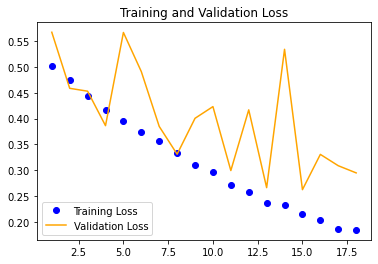

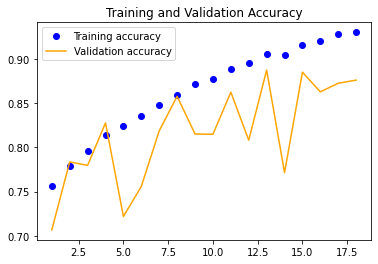

In [39]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [40]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [35]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.9727627413358916
AP Score: 0.9743021069063329

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4650
           1       0.96      0.82      0.88      5380

    accuracy                           0.88     10030
   macro avg       0.89      0.89      0.88     10030
weighted avg       0.90      0.88      0.88     10030

